
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.66      0.71       157
           1       0.74      0.82      0.78       186

    accuracy                           0.75       343
   macro avg       0.75      0.74      0.74       343
weighted avg       0.75      0.75      0.74       343



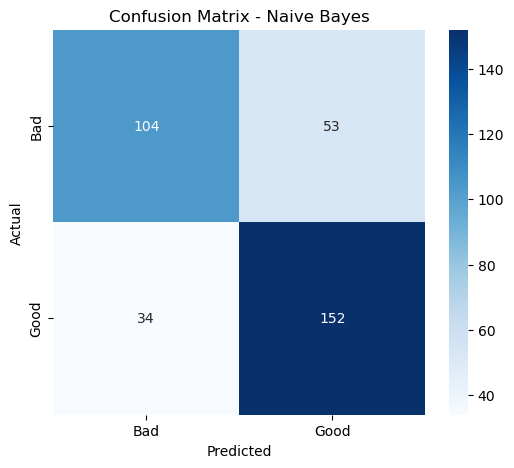

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load dataset
file_path = (r"C:\Users\KIIT\Downloads\archive (3)\WineQT.csv")
df = pd.read_csv(file_path)

# Drop 'Id' column if it exists
df.drop(columns=["Id"], errors="ignore", inplace=True)

# Define features and target
X = df.drop(columns=["quality"])
y = df["quality"]

# Convert target to binary classification (Good: 1, Bad: 0) based on quality threshold
y = np.where(y >= 6, 1, 0)  # Assuming quality 6 or higher is "Good"

# Split dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features (important for Naive Bayes)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Save results to CSV
model_name = "Naive Bayes"
df_results = pd.DataFrame({"Model": [model_name], "Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1-score": [f1]})
df_results.to_csv(f"{model_name}_results.csv", index=False)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Save results to CSV
model_name = "Naive Bayes"  # Change this to the actual model name
df_results = pd.DataFrame({"Model": [model_name], "Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1-score": [f1]})
df_results.to_csv(f"{model_name}_results.csv", index=False)
